# Homework 2 Programming Problem 7 (30 points)

## Problem Description

In this problem you will implement polynomial linear least squares regression on two datasets, with and without regularization. Additionally, you will use gradient descent to optimize for the model parameters.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

Results:
- Print fitted model parameters `w` for the 4 models requested without regularization
- Print fitted model parameters `w` for the 2 models requested *with* $L_2$ regularization
- Print fitted model parameters `w` for the one model solved via gradient descent

Plots:
- 2 plots of each dataset along with the ground truth function
- 4 plots of the fitted function along with the respective data and ground truth function for LLS without regularization
- 2 plots of the fitted function along with the respective data and ground truth function for LLS with $L_2$ regularization
- 1 plot of the fitted function along with the respective data and ground truth function for LLS with $L_2$ regularization solved via gradient descent

Discussion:
- Discussion of challenges fitting complex models to small datasets
- Discussion of difference between the $L_2$ regularized model versus the standard model
- Dicussion of whether gradient descent could get stuck in a local minimum
- Discussion of gradient descent results versus closed form results

#### Imports and Utility Functions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gt_function():
    xt = np.linspace(0,1,101)
    yt = np.sin(2 *np.pi*xt)
    return xt, yt

def plot_data(x,y,xt,yt,title = None):
    # Provide title as a string e.g. 'string'
    plt.plot(x,y,'bo',label = 'Data')
    plt.plot(xt,yt,'g-', label = 'Ground Truth')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    if title:
        plt.title(title)
    plt.show()

def plot_model(x,y,xt,yt,xr,yr,title = None):
    # Provide title as a string e.g. 'string'
    plt.plot(x,y,'bo',label = 'Data')
    plt.plot(xt,yt,'g-', label = 'Ground Truth')
    plt.plot(xr,yr,'r-', label = 'Fitted Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    if title:
        plt.title(title)
    plt.show()

## Load and visualize the data

The data is contained in `d10.npy` and `d100.npy` and can be loaded with `np.load()`. 

Store the data as:
- `x10` and `x100` (the first column of the data)
- `y10` and `y100` (the second column of the data)

Generate the ground truth function $f(x)=\textrm{sin}(2\pi x)$ using `xt, yt = gt_function()`.

Then visualize the each dataset with `plotxy(x,y,xt,yt,title)` with an appropriate title. You should generate two plots.

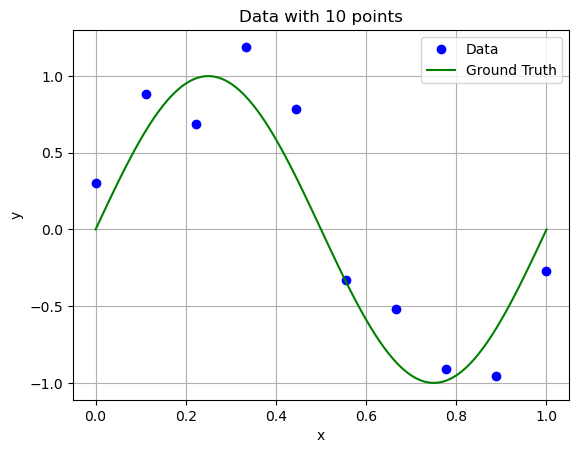

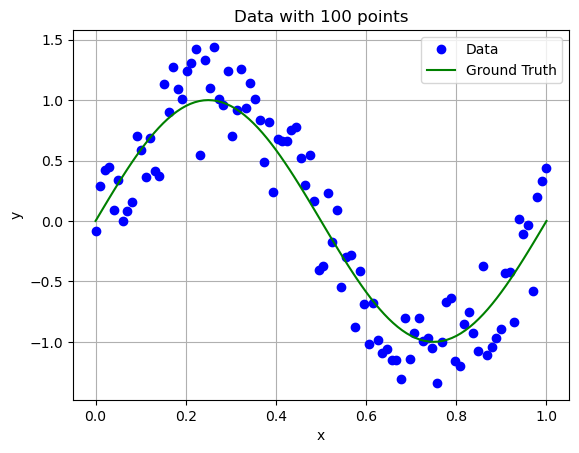

In [5]:
# YOUR CODE GOES HERE
data10 = np.load('d10.npy')
data100 = np.load('d100.npy')
x10, y10 = data10[:,0], data10[:,1]
x100, y100 = data100[:,0], data100[:,1]

xt, yt = gt_function()
plot_data(x10,y10,xt,yt,title = 'Data with 10 points')
plot_data(x100,y100,xt,yt,title = 'Data with 100 points')

## Implement polynomial linear regression

Now you will implement polynomial linear least squares regression without regularization using the closed form solution from lecture to compute the model parameters. You will consider the following 4 cases:

1. Data:  data10.txt, Model: 2nd order polynomial (highest power of $x$ in your regression model = 2)  
1. Data: data100.txt, Model: 2nd order polynomial (highest power of $x$ in your regression model = 2)  
1. Data:  data10.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  
1. Data: data100.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)

For each model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.

In [97]:
# YOUR CODE GOES HERE
# 10 points

def plot_model(x,y,xt,yt,xr,yr,title = None):
    # Provide title as a string e.g. 'string'
    plt.plot(x,y,'bo',label = 'Data')
    plt.plot(xt,yt,'g-', label = 'Ground Truth')
    plt.plot(xr,yr,'r-', label = 'Fitted Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend()
    if title:
        plt.title(title)
    plt.show()
    
def n_order_regression(x, y, eta, order, epochs):
    # x: input data
    # y: output data
    # eta: learning rate
    # order: order of the polynomial
    # epochs: number of epochs
    # returns: weights, loss
    xr = np.linspace(0,1,101)
    Xr = np.vstack([xr**i for i in range(order+1)]).T
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    w = np.zeros(order+1).reshape(-1,1) # initialize weights, should plus 1 because of bias
    loss = np.zeros(epochs)
    X = np.column_stack([x**i for i in range(order+1)])
    for i in range(epochs):
        y_pred = np.dot(X,w)
        loss[i] = np.sum((y_pred - y)**2)
        grad = 2 * np.dot(X.T, np.dot(X, w) - y)
        w = w - eta * grad
    y_pred = np.dot(Xr,w)
    plot_model(x.flatten(),y.flatten(),x.flatten(),y.flatten(),xr,y_pred.flatten(),title = f'Fitted Function with {order} order polynomial')
    return "The weights are {w}", f"The loss is {loss}, the last loss is {loss[-1]}, the last weight is {w[-1]}. For more information, please see the plot below."

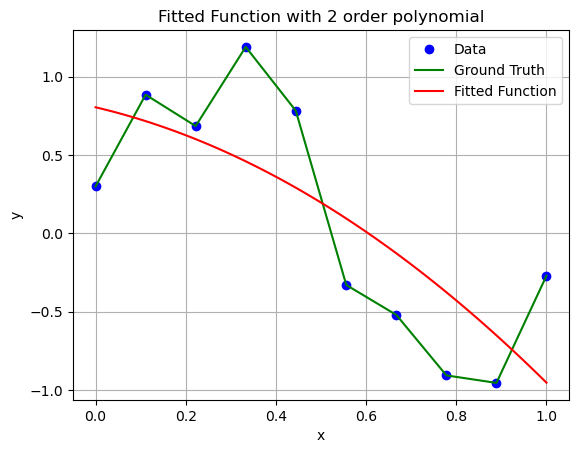

('The weights are {w}',
 'The loss is [5.554132   4.98282189 4.52020721 4.13579265 3.81616434 3.55039977\n 3.32942159 3.1456823  2.99290628 2.86587553 2.7602514  2.67242638\n 2.59940092 2.53868098 2.48819278 2.44621206 2.41130512 2.38227986\n 2.3581451  2.33807668 2.32138934 2.30751328 2.29597475 2.28637983\n 2.27840097 2.27176585 2.266248   2.26165916 2.25784276 2.25466864\n 2.25202856 2.24983253 2.24800572 2.24648591 2.24522137 2.24416908\n 2.24329328 2.24256424 2.24195721 2.24145165 2.24103046 2.24067942\n 2.24038672 2.24014252 2.23993867 2.23976835 2.23962593 2.23950671\n 2.23940678 2.2393229  2.23925236 2.23919292 2.23914271 2.23910018\n 2.23906404 2.23903322 2.23900682 2.23898411 2.23896446 2.23894736\n 2.23893238 2.23891918 2.23890745 2.23889696 2.23888749 2.23887888\n 2.23887098 2.23886369 2.23885689 2.23885052 2.23884449 2.23883877\n 2.23883329 2.23882803 2.23882294 2.23881801 2.23881321 2.23880852\n 2.23880392 2.23879941 2.23879497 2.23879059 2.23878627 2.23878199\n 2.2387777

In [100]:
n_order_regression(x10, y10, 0.03, 2, 1000)

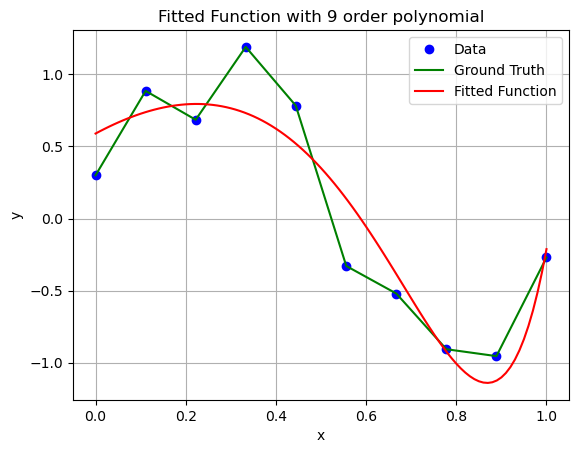

('The weights are {w}',
 'The loss is [5.554132   4.47081868 3.95337113 3.63343666 3.41512637 3.25279205\n 3.122555   3.01173837 2.91353975 2.82424678 2.74177657 2.66490902\n 2.59288421 2.52519075 2.46145428 2.40137868 2.34471476 2.29124355\n 2.24076716 2.19310371 2.14808434 2.1055514  2.06535722 2.02736322\n 1.99143922 1.95746289 1.92531918 1.89489993 1.86610341 1.83883393\n 1.8130015  1.78852149 1.76531427 1.74330497 1.72242315 1.70260256\n 1.68378088 1.66589951 1.64890331 1.63274043 1.61736208 1.60272239\n 1.58877819 1.5754889  1.56281634 1.55072457 1.53917983 1.52815032\n 1.51760616 1.50751923 1.49786307 1.4886128  1.47974502 1.47123771\n 1.46307016 1.45522289 1.44767756 1.44041694 1.4334248  1.4266859\n 1.42018586 1.4139112  1.4078492  1.40198791 1.39631609 1.39082316\n 1.38549916 1.38033474 1.37532107 1.37044988 1.36571336 1.36110416\n 1.3566154  1.35224056 1.34797353 1.34380856 1.33974024 1.33576346\n 1.33187343 1.32806564 1.32433584 1.32068003 1.31709445 1.31357555\n 1.31012001

In [104]:
n_order_regression(x10, y10, 0.03, 9, 1000)

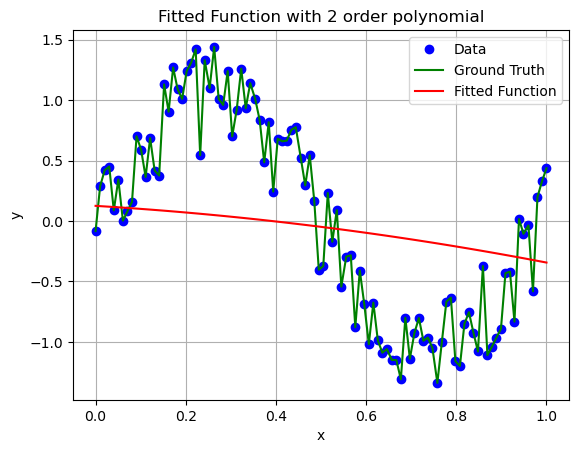

('The weights are {w}',
 'The loss is [66.91575086 64.9741776  63.33262729 61.87721837 60.54771124 59.31158661\n 58.15068326 57.05430831 56.01568326 55.03010926], the last loss is 55.03010926366704, the last weight is [-0.24344577]. For more information, please see the plot below.')

In [121]:
n_order_regression(x100, y100, 0.001, 2, 10)

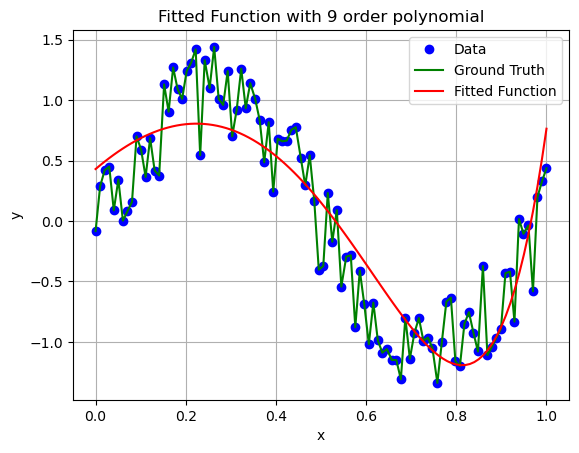

('The weights are {w}',
 'The loss is [66.91575086 63.32420688 60.86727899 ... 11.85158905 11.85131373\n 11.85103842], the last loss is 11.851038419416957, the last weight is [0.37512879]. For more information, please see the plot below.')

In [124]:
n_order_regression(x100, y100, 0.001, 9, 10000)

## Discussion:

When the sample size (number of data points) is small, what issues or tendencies do you see with complex models?

## Discussion:

When the sample size (number of data points) is small, what issues or tendencies do you see with complex models?

### *Your answer goes here*

## Implement polynomial linear regression with $L_2$ regularization

You will repeat the previous section, but this time using $L_2$ regularization. Your regularization term should be $\lambda w' \mathbb{I}_m w$, where $\lambda = e^{-10}$, and $\mathbb{I}_m$ is the modified identity matrix that masks out the bias term  from  regularization. 

You will consider only two cases:
1. Data:  data10.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  
1. Data: data100.txt, Model: 9th order polynomial (highest power of $x$ in your regression model = 9)  

For each model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.

In [4]:
# YOUR CODE GOES HERE
def n_order_regression_regular(x, y, eta, order, epochs, regular=False, lamda=np.e-10):
    # x: input data
    # y: output data
    # eta: learning rate
    # order: order of the polynomial
    # epochs: number of epochs
    # returns: weights, loss
    # regular_type: 'L1' or 'L2'
    xr = np.linspace(0,1,101)
    Xr = np.vstack([xr**i for i in range(order+1)]).T
    x = x.reshape(-1,1)
    y = y.reshape(-1,1)
    w = np.zeros(order+1).reshape(-1,1) # initialize weights, should plus 1 because of bias
    loss = np.zeros(epochs)
    X = np.column_stack([x**i for i in range(order+1)])
    for i in range(epochs):
        y_pred = np.dot(X,w)
        loss[i] = np.sum((y_pred - y)**2)
        if regular:
            I_m = np.eye(x.shape[0])
            regular_w = np.linalg.inv(X.T @ X + lamda*I_m) @ X.T @ y
        else:
            grad = 2 * np.dot(X.T, np.dot(X, w) - y)
        w = w - eta * grad
    y_pred = np.dot(Xr,w)
    plot_model(x.flatten(),y.flatten(),x.flatten(),y.flatten(),xr,y_pred.flatten(),title = f'Fitted Function with {order} order polynomial')
    return "The weights are {w}", f"The loss is {loss}, the last loss is {loss[-1]}, the last weight is {w[-1]}. For more information, please see the plot below."

In [125]:
e-10

NameError: name 'e' is not defined

## Discussion:

What differences between the regularized and standard 9th order models fit to `d10` do you notice? How does regularization affect the fitted function?

### *Your answer goes here*

## LLS with $L_2$ regularization and gradient descent

For complex models, the size of $X'X$ can be large, making matrix inversion computationally demanding. Instead, one can use gradient descent to compute $w$. In our notes, we derived the gradient descent approach both for unregularized as well as $L_2$ regularized linear regression. The formula for the gradient descent approach with $L_2$ regularization is:  

$ \frac{\partial obj}{\partial w} = X'Xw - X'y + \lambda \mathbb{I}_m w$

$ w^{new} \leftarrow w^{cur} - \alpha \frac{\partial obj}{\partial w}$


In this problem, could gradient descent get stuck in a local minimum? Explain why / why not?

### *Your answer goes here*

You will consider just a single case in the following question:

1. Data:  data10.txt, Model: 9th order polynomial.

Starting with a weight vector of zeros as the initial guess, and $\lambda = e^{-10}$, $\alpha = 0.075$, apply 50000 iterations of
gradient descent to find the optimal model parameters. In practice, when you train your own models you will have to determine these parameters yourself!

For the trained model:
- Print the learned model parameters `w`
- Use the model parameters `w` to predict `yr` values over a range of x values given by `xr = np.linspace(0,1,101)`
- Plot the data, ground truth function, and regressed model using `plot_model(x,y,xt,yt,xr,yr,title)` with an appropriate title.


In [5]:
# YOUR CODE GOES HERE

## Discussion:

Visually compare the result you just obtained to the same 9th order polynomial model with $L_2$ regularization where you solved for `w` directly in the previous section. They should be very similar. Comment on whether gradient descent has converged. 

### *Your answer goes here*